## WeatherPy - Aalvarez - update

In [35]:
#Created on Sun Sep 4 07:12 2018
#@author: anthonyalvarez
#Test Files: WeatheyPy_00.ipynb - WeatheyPy_03.ipynb

#updated on Sun Sep 9 23:11 2018

### Referenced Material
 * https://bootcampspot-v2.com/sessions/472909/videos/25279
 * http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.set_value.html
 * https://stackoverflow.com/questions/5244810/python-appending-a-dictionary-to-a-list-i-see-a-pointer-like-behavior
 * https://stackoverflow.com/questions/5242933/what-was-the-motivation-for-doing-lists-augmented-assignment-in-place-in-py
 * https://stackoverflow.com/questions/4432208/how-does-work-in-python
 * https://python-reference.readthedocs.io/en/latest/docs/operators/modulus.html
 * https://stackoverflow.com/questions/43668827/python-modulo-function
 * https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names
 * https://www.tutorialspoint.com/python/string_title.htm
 * https://stackoverflow.com/questions/134934/display-number-with-leading-zeros
 * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
 * https://matplotlib.org/examples/color/colormaps_reference.html
 * dates from the openweatherapi are stored as [dt] Time of data calculation, unix, UTC
 * https://openweathermap.org/current
 * https://stackoverflow.com/questions/46565580/convert-unix-timestamp-in-python-to-datetime-and-make-2-hours-behind
 * https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib

## Requirements

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

---
### Data Sources ![Data Sources Used](images/owm_01.png "OpenWeather")

* [OpenWeather](https://openweathermap.org/api) Openweather Data


---
### Data Visualizations

<a href="images/latitude_vs_temperature_ud_01.png" target="_blank">Latitude Vs. Temperature (F)</a>
<img src="images/latitude_vs_temperature_ud_01.png" alt="Lat V Temp" height="600" width="400">

<a href="images/latitude_vs_humidity_ud_02.png" target="_blank">Latitude Vs. Humidity (%)</a>
<img src="images/latitude_vs_humidity_ud_02.png" alt="Lat V Humidity" height="600" width="400">


* <a href="images/latitude_vs_humidity_ud_1_OFF_02.png" target="_blank">Latitude Vs. Humidity (%) 1 OFF Anomaly</a>
<img src="images/latitude_vs_humidity_ud_1_OFF_02.png" alt="Lat V Humidity 1 OFF" height="600" width="400">


<a href="images/latitude_vs_clouds_ud_03.png" target="_blank">Latitude Vs. Cloudiness (%)</a>
<img src="images/latitude_vs_clouds_ud_03.png" alt="Lat V Clouds" height="600" width="400">

<a href="images/latitude_vs_winds_ud_04.png" target="_blank">Latitude Vs. Wind Speed (MPH)</a>
<img src="images/latitude_vs_winds_ud_04.png" alt="Lat V Wind" height="600" width="400">

---
### Data Output ![Data Sources Used](images/excelcsv.png "Excel Csv")
* [Output Data](data/city_weather_ud_2018-09-09.csv) Output data from API used for visualizations
    

---
### Observable Trends - updated

 * There is a discernable concentration of elevated temperatures near, around or on the equator. Not only is it obvious but now is substantiated by the evidence of the data collected from openweather.org


 * There does not appear to be a relation between wind speed or the amount of cloudiness and latitude.


 * Also worth noting, is that although many areas show high temperatures near the equator, there are also a few areas where we may near cold or freezing points.
 

---
## Dependencies

In [2]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime, timedelta

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


---
## Functions

In [3]:
#function for time conversion
#https://stackoverflow.com/questions/46565580/convert-unix-timestamp-in-python-to-datetime-and-make-2-hours-behind
def unixtodate(unix_ts):
    #unix_ts = 1507126064
    dt = (datetime.fromtimestamp(unix_ts) - timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    return dt

#created this to append the date to the file name later on
def datatofile(filepath, filename, texttoadd, fileext):
    output_file = filepath + filename + "_" + texttoadd + fileext
    return output_file
    

---
## File Operations

In [4]:
#image path
image_path = "images/"
image_name = ""
image_date = ""
image_extension = ".png"

# Output File (CSV)
file_path = "data/"
file_name = "city_weather_ud"
file_date = ""
file_extension = ".csv"


---
## Functional Logic

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#add a list to view cities found nearby
citiesnearby = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#join the data for a workable use variable
lat_lngs = zip(lats, lngs)


In [6]:
#using the code to build a dataframe for lat/long visaid
#maybe create a dataframe with empty columns and then add to it?
#https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names

#bad syntax missing {}
#latlong_df = pd.DataFrame("Lat": lats, "Long": lngs)
latlong_df = pd.DataFrame({"Lat": lats, "Long": lngs})

#verify data
latlong_df.head()

,Lat,Long
0,-12.311580,-149.877592
1,-15.008593,134.774705
2,79.719193,-111.189390
3,72.704070,-96.638780
4,62.068100,44.639216


In [7]:

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #find the total amount of cities nearby because im curious
    citiesnearby.append(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        #print(city)
        cities.append(city)

# Print the city count to confirm sufficient count
#print(len(cities))
#print(len(citiesnearby))

num_cities_found = len(cities)
num_coordinates = len(citiesnearby)

print(f'Using {num_coordinates} coordinates, found {num_cities_found} citie(s)')


Using 1500 coordinates, found 598 citie(s)


In [8]:
#view the collected output
cities_df = pd.DataFrame({"Cities":cities})
cities_df.head()

,Cities
0,fare
1,ngukurr
2,yellowknife
3,thompson
4,verkhnyaya toyma


In [9]:
#configure the base url to be used
baseurl = "http://api.openweathermap.org/data/2.5/weather?"

#we dont want celsius
#units = "metric"

#we do want to use farenheit
units = "imperial"

# Build partial query URL
query_url = f"{baseurl}appid={api_key}&units={units}&q="

#print to view/verify our working url
#print(query_url)

---
### Main Data Fetch

In [10]:

#used for testing only --------->
#track the unique responses, found 2 [200, 404]
#responsetypes = [] 
#<-------------------------------

#set up a counter
counter = 0

#set up a variable to break a certain # of times out of the loop(for testing)
numbreak = 15

#count cities added
citiesadded = 0

#set up a grouping or modulus group using %
modnum = 50

#set the counter for the group starting at Group 1
modgroup = 1

#use a dictionary object to capture info
#weathercities = {"city":,"country":}

#PROBLEMS!!! = [(face2desk)for problem in pythonproblems] :)

#dictionary object not working using list instead
weathercities = []


print('-----------------------------')
print(f'Begin Processing from {len(cities)} Cities. {numbreak} Attempts')
print('-----------------------------')


#loop through the dataframe
for index, row in cities_df.iterrows():
    
    #grab the city into a variable
    #print(row["Cities"])
    thecity = row["Cities"]
    
    #add the city into the base url 
    city_url = query_url + thecity
    #print(city_url)
    
    #get data from the api call
    city_response = requests.get(city_url).json()
        

    ##This section for testing only ---------->
    ##checking for bad responses, only check to see if its possible to get have errors
    ##results are we found 2 different response types so we have to deal with them
    #responsetype = requests.get(city_url).status_code
    #if responsetype not in responsetypes:
    #    responsetypes.append(responsetype)
    ##<-----------------End testing reponse types
    
    #testing mod groups
    #if (index % 2 == 0):
        #modgroup +=1
    #<----end mod testing
        
    
    
    #if we find a response with 404 we need to skip it
    responsetype = requests.get(city_url).status_code
    #print(responsetype)
    
    #really only care about a good response
    if responsetype == 200:
        citiesadded += 1
        #print(responsetype)
        #print(city_response["id"])
        #print(city_response["sys"]["country"])
        city_id = city_response["id"]
        city_country = city_response["sys"]["country"]
        
        
        #ISSUE WAS HERE IN MY ERR---->
        #city_lat = city_response["coord"]["lon"]
        city_lat = city_response["coord"]["lat"]
        
        #city_long = city_response["coord"]["lat"]
        city_long = city_response["coord"]["lon"]
        #<---------------------------------------
        
        city_name = city_response["name"]
        city_temp_max = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_winds = city_response["wind"]["speed"]
        
        #use function to convert unix to datetime
        city_analysis_date = unixtodate(city_response["dt"])
        
        #make it so that the cities added Groupings are ONLY for cities added, 
        #and NOT for the entire list we are searching, this would give us inconsistencies in groups
        if (citiesadded % modnum ==0):
            modgroup +=1
        
        #print(f'ID:{city_id} Country:{city_country} City:{city_name}')
        
        #adding date of analysis
        weathercities.append({"cityid":city_id
                              ,"country":city_country
                              ,"city":city_name
                              ,"lat":city_lat
                              ,"long":city_long
                              ,"max temp":city_temp_max
                              ,"humidity":city_humidity
                              ,"cloudiness":city_clouds
                              ,"wind speed":city_winds
                              ,"groupingid":modgroup
                              ,"analysis date":city_analysis_date
                             })

        #print(f'Adding {counter} city{city_name} ModGroup# {modgroup}')
        #"{:10.4f}".format(x)
        #https://stackoverflow.com/questions/134934/display-number-with-leading-zeros
        print(f'{str(index).zfill(2)}: Add  {citiesadded} City: {thecity.title()} Group {modgroup}')
        
    else:
        #print(f'City:{thecity} Response:{responsetype}')
        print(f'{str(index).zfill(2)}: Skip ** City:{thecity.title()} not found.')
    
    #print(f'ModGroup# {modgroup}')
    
    
    #Begin testing break------>
    #testing for the first 5 records
    #if counter == numbreak:
    #    break
    #<-----------end testing
      
    #increment the counter
    counter+=1
        

  
    #display a final output of status
print('-----------------------------')
print('Data Retrieval Complete      \n')


-----------------------------
Begin Processing from 598 Cities. 15 Attempts
-----------------------------
00: Add  1 City: Fare Group 1
01: Skip ** City:Ngukurr not found.
02: Add  2 City: Yellowknife Group 1
03: Add  3 City: Thompson Group 1
04: Add  4 City: Verkhnyaya Toyma Group 1
05: Add  5 City: Souillac Group 1
06: Add  6 City: Faanui Group 1
07: Add  7 City: Port Alfred Group 1
08: Add  8 City: Tasiilaq Group 1
09: Add  9 City: Marion Group 1
10: Add  10 City: Rikitea Group 1
11: Add  11 City: Ushuaia Group 1
12: Add  12 City: Mataura Group 1
13: Add  13 City: Dingle Group 1
14: Add  14 City: Hithadhoo Group 1
15: Add  15 City: Kaitangata Group 1
16: Add  16 City: Tiksi Group 1
17: Add  17 City: Atuona Group 1
18: Add  18 City: Arraial Do Cabo Group 1
19: Add  19 City: Taltal Group 1
20: Add  20 City: La Entrada Group 1
21: Add  21 City: Puerto Ayora Group 1
22: Add  22 City: Torbay Group 1
23: Add  23 City: Qaanaaq Group 1
24: Add  24 City: Ubatuba Group 1
25: Add  25 City: San

222: Add  201 City: Saiha Group 5
223: Add  202 City: Trat Group 5
224: Add  203 City: Grootfontein Group 5
225: Add  204 City: Mahon Group 5
226: Add  205 City: Fortuna Group 5
227: Add  206 City: Kahului Group 5
228: Add  207 City: Berlevag Group 5
229: Add  208 City: Nieuw Nickerie Group 5
230: Add  209 City: Winnemucca Group 5
231: Add  210 City: Odda Group 5
232: Add  211 City: Pacific Grove Group 5
233: Add  212 City: Praia Da Vitoria Group 5
234: Add  213 City: Tiznit Group 5
235: Add  214 City: Aswan Group 5
236: Add  215 City: Awjilah Group 5
237: Add  216 City: Safranbolu Group 5
238: Add  217 City: Twistringen Group 5
239: Skip ** City:Palabuhanratu not found.
240: Add  218 City: Taonan Group 5
241: Add  219 City: Naze Group 5
242: Add  220 City: Vytegra Group 5
243: Add  221 City: Sao Gabriel Da Cachoeira Group 5
244: Add  222 City: Ust-Uda Group 5
245: Add  223 City: Oriximina Group 5
246: Add  224 City: Saint Marys Group 5
247: Add  225 City: Aranos Group 5
248: Add  226 

440: Add  403 City: Arvika Group 9
441: Add  404 City: Marrakesh Group 9
442: Skip ** City:Galiwinku not found.
443: Add  405 City: Rimbey Group 9
444: Skip ** City:Sentyabrskiy not found.
445: Add  406 City: Khorramshahr Group 9
446: Add  407 City: Namwala Group 9
447: Skip ** City:Sinkat not found.
448: Add  408 City: Coahuayana Group 9
449: Add  409 City: Atasu Group 9
450: Add  410 City: Pringsewu Group 9
451: Add  411 City: Broken Hill Group 9
452: Add  412 City: Ocos Group 9
453: Skip ** City:Sahrak not found.
454: Add  413 City: Talnakh Group 9
455: Add  414 City: Bonavista Group 9
456: Add  415 City: Davila Group 9
457: Add  416 City: Vestmannaeyjar Group 9
458: Add  417 City: Grindavik Group 9
459: Skip ** City:Mys Shmidta not found.
460: Add  418 City: Paamiut Group 9
461: Add  419 City: Kailua Group 9
462: Add  420 City: Lodwar Group 9
463: Add  421 City: Bon Air Group 9
464: Add  422 City: Burnie Group 9
465: Add  423 City: Kudahuvadhoo Group 9
466: Add  424 City: Virginia 

## Data Retrieval Summary

In [11]:
#display a nice summary for a more detailed analysis
#we could even output the combined data from above together with this summary
#to a text file
print('********SUMMARY**************')
print(f'Using {num_coordinates} coordinates, found {num_cities_found} citie(s).')
print(f'Created {modgroup} group(s) from a total of {len(weathercities)} citie(s).')
print('-----------------------------')

********SUMMARY**************
Using 1500 coordinates, found 598 citie(s).
Created 11 group(s) from a total of 545 citie(s).
-----------------------------


In [12]:
#create a workable dataframe to house api data
weather_cities_df = pd.DataFrame(weathercities)
#view the columns/data
weather_cities_df.head()

,analysis date,city,cityid,cloudiness,country,groupingid,humidity,lat,long,max temp,wind speed
0,2018-09-09 12:48:46,Fare,4034496,20,PF,1,100,-16.70,-151.02,76.60,6.51
1,2018-09-09 12:00:00,Yellowknife,6185377,20,CA,1,49,62.45,-114.38,48.20,4.70
2,2018-09-09 12:00:00,Thompson,6165406,90,CA,1,87,55.74,-97.86,57.20,6.93
3,2018-09-09 12:48:47,Verkhnyaya Toyma,474470,0,RU,1,86,62.24,45.00,36.37,2.59
4,2018-09-09 12:30:00,Souillac,3026644,0,FR,1,83,45.60,-0.60,69.80,5.82


In [13]:
#check for consistent values
print(weather_cities_df.count())


analysis date    545
city             545
cityid           545
cloudiness       545
country          545
groupingid       545
humidity         545
lat              545
long             545
max temp         545
wind speed       545
dtype: int64


## Data Output

In [14]:
#Attempt to get the date for use in charts, titles, etc...

#SOOO many issues trying to obtain a proper date formats im not even going to 
#comment on my struggle here, noted the references in its corresponding location

#get the max analysis date and use for plot titles etc.
analysisdate = weather_cities_df["analysis date"].max()

#split the date because we dont want the time
analysisdate = analysisdate.split(" ")

#get the hyphenated date for appending to file name
file_date = analysisdate[0]
print(file_date)

#use the date part of the date
analysisdate = analysisdate[0]
#https://stackoverflow.com/questions/14524322/how-to-convert-a-date-string-to-different-format
#print(analysisdate)

#format to a nicer looking string to add to titles
analysisdate = datetime.strptime(analysisdate, '%Y-%m-%d').strftime('%m/%d/%y')
print(analysisdate)

2018-09-09
09/09/18


In [15]:
#append the date to the file name
fileoutput = datatofile(file_path, file_name, file_date, file_extension)
print(fileoutput)

#export the dataframe to csv
weather_cities_df.to_csv(fileoutput)

data/city_weather_ud_2018-09-09.csv


## Plotting Logic

In [16]:
#set up variables from the dataframe

#x plot lattitudes
xplot_lats = weather_cities_df["lat"]


#temperatures
yplot_temp = weather_cities_df["max temp"]

#humidities
yplot_humid = weather_cities_df["humidity"]

#cloudiness
yplot_clouds = weather_cities_df["cloudiness"]

#wind speeds
yplot_winds = weather_cities_df["wind speed"]


#used for dynamic titles..
begintitle = "City Latitude vs. "
endtitle =  " as of " + analysisdate

#leaving these empty for now so i dont lose my mind
current_title = ""
current_x_title = ""
current_y_title = ""

ymarker = "o"
x_label = "Cities"



## Temperature (f) vs. Latitude

<IPython.core.display.Javascript object>


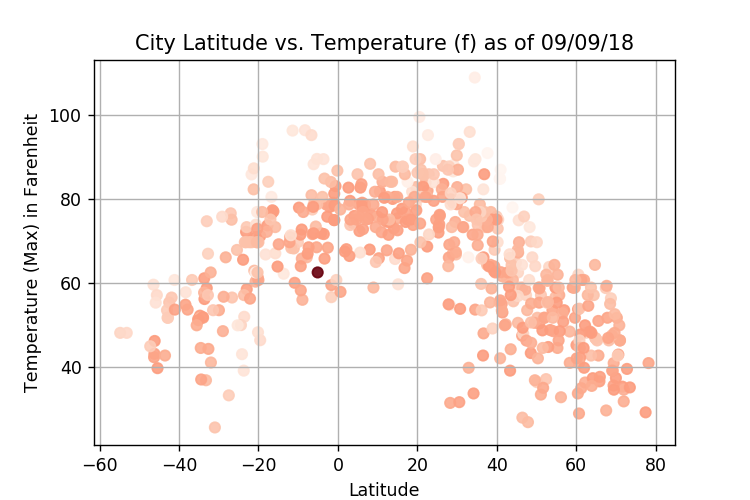

In [31]:
#Temperature (f) vs. Latitude

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
current_title = begintitle + "Temperature (f)" + endtitle
current_x_title = "Latitude"
current_y_title = "Temperature (Max) in Farenheit"

plt.figure(figsize=(6,4))

plt.scatter(xplot_lats, yplot_temp
            ,label=x_label, marker=ymarker
            ,alpha=.9
            ,c=yplot_humid,cmap="Reds")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

#save the image
image_name = "latitude_vs_temperature_ud"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "01", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


---
## Latitude vs. Humidity

<IPython.core.display.Javascript object>


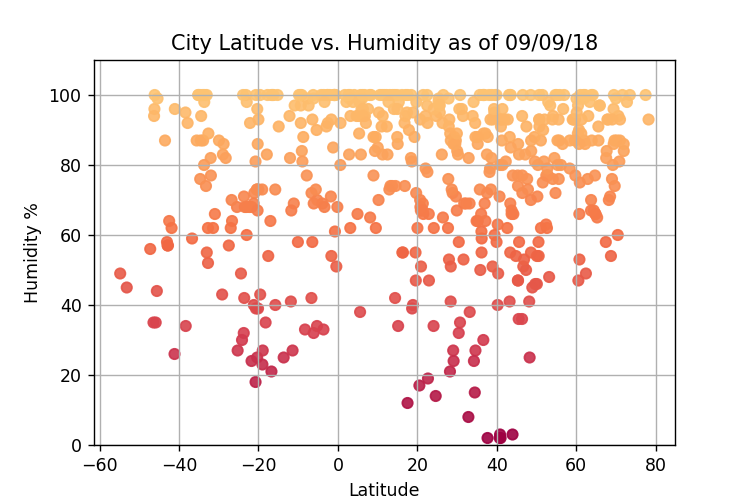

In [32]:
#Humidity (f) vs. Latitude
current_title = begintitle + "Humidity" + endtitle
#current_x_title = "Latitude"
current_y_title = "Humidity %"

plt.figure(figsize=(6,4))

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_humid
            ,label=x_label, marker=ymarker
            ,alpha=.9
            ,c=yplot_humid,cmap="Spectral")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)



#deal with the anomaly, we have 1 value that is way too high for 
#the charts and thus throws off the graphing, will remove just for this chart
plt.ylim(0,110)
#------------------------------------------------------------------------

plt.grid()

#save the image
image_name = "latitude_vs_humidity_ud"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "02", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


## Latitude vs. Cloudiness

<IPython.core.display.Javascript object>


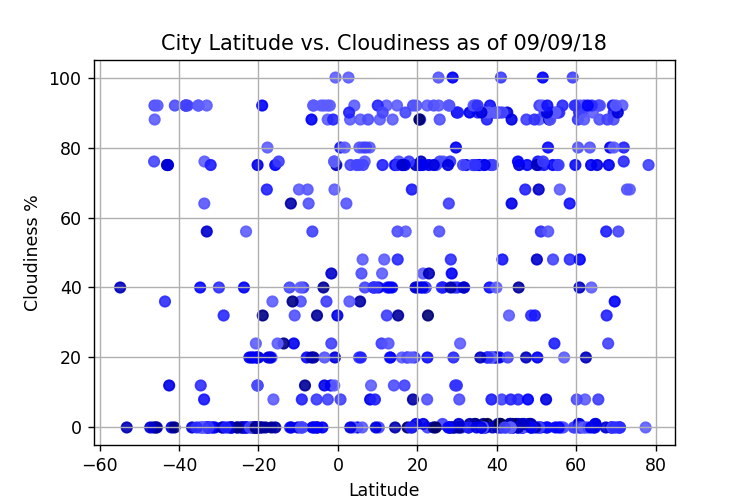

In [33]:
#Cloudiness vs. Latitude
current_title = begintitle + "Cloudiness" + endtitle
#current_x_title = "Latitude"
current_y_title = "Cloudiness %"

plt.figure(figsize=(6,4))

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_clouds
            ,label=x_label, marker=ymarker
            ,alpha=.9
            ,c=yplot_humid,cmap="seismic")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

#save the image
image_name = "latitude_vs_clouds_ud"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "03", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


## Latitude vs. Wind Speed

<IPython.core.display.Javascript object>


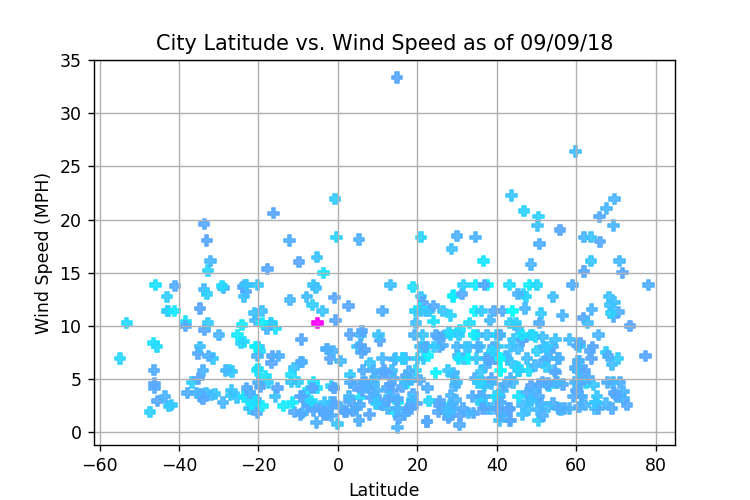

In [34]:
#Wind Speed vs. Latitude
current_title = begintitle + "Wind Speed" + endtitle
#current_x_title = "Latitude"
current_y_title = "Wind Speed (MPH)"

plt.figure(figsize=(6,4))

#https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
#https://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(xplot_lats, yplot_winds
            ,label=x_label, marker="P"
            ,alpha=.9
            ,c=yplot_humid,cmap="cool")

plt.title(current_title)
plt.xlabel(current_x_title)
plt.ylabel(current_y_title)
plt.grid()

#save the image
image_name = "latitude_vs_winds_ud"
#append a number to the file name
imageoutput = datatofile(image_path, image_name, "04", image_extension)
plt.savefig(imageoutput)
#print(imageoutput)

plt.show()


---
## WeatherPy - Aalvarez

![Equator Sign](images/equatorsign.png "Equator")